In [396]:

import numpy as np 
import pandas as pd 


In [397]:

retail_df = pd.read_csv('C:/Users/ASUS/OnlineRetail.csv', encoding="ISO-8859-1")

In [398]:
def metadata(df):
    metadata = pd.DataFrame()
    metadata['Columns'] = df.columns
    metadata['Dtypes'] = df.dtypes.values
    metadata['Null_Values'] = df.isnull().sum().values
    metadata['Percentage_Null'] = round(metadata['Null_Values']/df.shape[0] *100 , 2)
    return metadata

In [399]:
metadata(retail_df)

,Columns,Dtypes,Null_Values,Percentage_Null
0,InvoiceNo,object,0,0.00
1,StockCode,object,0,0.00
2,Description,object,1454,0.27
3,Quantity,int64,0,0.00
4,InvoiceDate,object,0,0.00
5,UnitPrice,float64,0,0.00
6,CustomerID,float64,135080,24.93
7,Country,object,0,0.00


InvoiceDate is 'object' type column

we convert it to datetime

In [400]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], infer_datetime_format=True, format= '%Y%m%d')

In [401]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [402]:
print(retail_df['InvoiceDate'].min())
print(retail_df['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


We need only date and we will remove the hour time 

In [403]:
retail_df['InvoiceDate'] = retail_df['InvoiceDate'].apply(lambda x : pd.to_datetime(x.date(), infer_datetime_format=True))

In [404]:
print(retail_df['InvoiceDate'].min())
print(retail_df['InvoiceDate'].max())

2010-12-01 00:00:00
2011-12-09 00:00:00


In [405]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [406]:
metadata(retail_df)

,Columns,Dtypes,Null_Values,Percentage_Null
0,InvoiceNo,object,0,0.00
1,StockCode,object,0,0.00
2,Description,object,1454,0.27
3,Quantity,int64,0,0.00
4,InvoiceDate,datetime64[ns],0,0.00
5,UnitPrice,float64,0,0.00
6,CustomerID,float64,135080,24.93
7,Country,object,0,0.00


Lets check if it is possible to get null 'CustomerID' by finding 'InvoiceNo' which have with similer wih 'CustomerID'

In [407]:
retail_df[retail_df['InvoiceNo'] == '536544']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1965,536544,21721,CANDY SHOP STICKER SHEET,1,2010-12-01,1.66,NaN,United Kingdom
1966,536544,21722,SWEET PUDDING STICKER SHEET,1,2010-12-01,1.66,NaN,United Kingdom
1967,536544,21731,RED TOADSTOOL LED NIGHT LIGHT,5,2010-12-01,3.36,NaN,United Kingdom
1968,536544,21742,LARGE ROUND WICKER PLATTER,1,2010-12-01,12.72,NaN,United Kingdom


In [408]:
retail_df['CustomerID'].isnull().sum()

135080

In [409]:
 retail_df['InvoiceNo'].isin(retail_df[retail_df['CustomerID'].isnull()]['InvoiceNo']).sum()

135080

Drop Null Rows

In [410]:
retail_df.dropna(subset=['CustomerID'], inplace=True)

In [411]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype('int')

In [412]:
metadata(retail_df)

,Columns,Dtypes,Null_Values,Percentage_Null
0,InvoiceNo,object,0,0.0
1,StockCode,object,0,0.0
2,Description,object,0,0.0
3,Quantity,int64,0,0.0
4,InvoiceDate,datetime64[ns],0,0.0
5,UnitPrice,float64,0,0.0
6,CustomerID,int32,0,0.0
7,Country,object,0,0.0


In [413]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


In [414]:
retail_df.Country.value_counts().head(5)

United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Name: Country, dtype: int64

These are the cancelled orders

In [415]:
retail_df[retail_df['Quantity'] <0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09,1.25,17315,United Kingdom


In [416]:
retail_df.isin(retail_df[retail_df['Quantity'] <0]['InvoiceNo'].apply(lambda x: x.split('C')[1]).values)['InvoiceNo'].sum()

0

We will remove the canceled order


In [417]:
retail_df[retail_df['CustomerID'] == 14213]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5232,C536850,22942,CHRISTMAS LIGHTS 10 SANTAS,-48,2010-12-03,7.65,14213,United Kingdom
5233,C536850,22689,DOORMAT MERRY CHRISTMAS RED,-50,2010-12-03,6.75,14213,United Kingdom
5234,C536850,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,-50,2010-12-03,2.55,14213,United Kingdom
5235,C536850,22580,ADVENT CALENDAR GINGHAM SACK,-48,2010-12-03,4.95,14213,United Kingdom
5236,C536850,22186,RED STAR CARD HOLDER,-48,2010-12-03,2.55,14213,United Kingdom


In [418]:
retail_df = retail_df[retail_df['Quantity'] >0]

In [419]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


calculate total amount for each transaction

In [420]:
retail_df['Total_Amount'] = retail_df['Quantity']*retail_df['UnitPrice']

In [421]:
# Monetery value for each customer 
totalMonetery = retail_df['Total_Amount'].groupby(retail_df['CustomerID']).sum()

In [422]:
totalMonetery

CustomerID
12346    77183.60
12347     4310.00
12348     1797.24
12349     1757.55
12350      334.40
           ...   
18280      180.60
18281       80.82
18282      178.05
18283     2094.88
18287     1837.28
Name: Total_Amount, Length: 4339, dtype: float64

In [423]:
totalMonetery.sort_values()

CustomerID
13256         0.00
16738         3.75
14792         6.20
16454         6.90
17956        12.75
           ...    
14911    143825.06
16446    168472.50
17450    194550.79
18102    259657.30
14646    280206.02
Name: Total_Amount, Length: 4339, dtype: float64

In [424]:
retail_df[retail_df['CustomerID'] == 16738]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
90155,543986,46000U,POLYESTER FILLER PAD 30CMx30CM,3,2011-02-15,1.25,16738,United Kingdom,3.75


Get the frequency for each customer

In [425]:
count_dates1 = retail_df['InvoiceDate'].groupby(retail_df['CustomerID']).count()
count_dates1 = count_dates1.reset_index()
count_dates1

,CustomerID,InvoiceDate
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4334,18280,10
4335,18281,7
4336,18282,12
4337,18283,756


In [426]:
temp_rfm = retail_df['InvoiceDate'].groupby(by = retail_df['CustomerID']).max()
temp_rfm = temp_rfm.reset_index()
temp_rfm['Frequency'] = list(count_dates1['InvoiceDate'])


In [427]:
temp_rfm

,CustomerID,InvoiceDate,Frequency
0,12346,2011-01-18,1
1,12347,2011-12-07,182
2,12348,2011-09-25,31
3,12349,2011-11-21,73
4,12350,2011-02-02,17
...,...,...,...
4334,18280,2011-03-07,10
4335,18281,2011-06-12,7
4336,18282,2011-12-02,12
4337,18283,2011-12-06,756


In [428]:
study_date = pd.datetime(2011,12,31)
type(study_date)

datetime.datetime

In [429]:
recent = study_date - retail_df['InvoiceDate'] 

In [430]:
recent

0        395 days
1        395 days
2        395 days
3        395 days
4        395 days
           ...   
541904    22 days
541905    22 days
541906    22 days
541907    22 days
541908    22 days
Name: InvoiceDate, Length: 397924, dtype: timedelta64[ns]

In [431]:
print(temp_rfm['InvoiceDate'].min())
print(temp_rfm['InvoiceDate'].max())

2010-12-01 00:00:00
2011-12-09 00:00:00


In [432]:
print(retail_df['InvoiceDate'].min())
print(retail_df['InvoiceDate'].max())

2010-12-01 00:00:00
2011-12-09 00:00:00


In [433]:
temp_rfm['Recency'] = study_date - temp_rfm['InvoiceDate'] 
temp_rfm['Recency'] = temp_rfm['Recency'].apply(lambda x : x.days)

In [434]:
temp_rfm['Monetory'] = list(retail_df['Total_Amount'].groupby(retail_df['CustomerID']).sum())

In [435]:
temp_rfm

,CustomerID,InvoiceDate,Frequency,Recency,Monetory
0,12346,2011-01-18,1,347,77183.60
1,12347,2011-12-07,182,24,4310.00
2,12348,2011-09-25,31,97,1797.24
3,12349,2011-11-21,73,40,1757.55
4,12350,2011-02-02,17,332,334.40
...,...,...,...,...,...
4334,18280,2011-03-07,10,299,180.60
4335,18281,2011-06-12,7,202,80.82
4336,18282,2011-12-02,12,29,178.05
4337,18283,2011-12-06,756,25,2094.88


In [455]:
for i in range(4,1,-1):
    print (i)

4
3
2


In [466]:
def rscore2(r, quantile_rfm, no_buckets, linspace_quan):
    for i in range(1,no_buckets):
        if r<=quantile_rfm['Recency'][linspace_quan[i]]:
            return i
            #print(linspace_quan[i])
    return no_buckets
    
    
    
def f_m_score2(r, freORmon, quantile_rfm,no_buckets, linspace_quan):
    for i in range(no_buckets,1,-1):
        if r<=quantile_rfm[freORmon][linspace_quan[ (no_buckets+1) - i]]:
            return i
    return 1


In [467]:
def create_buckets(df, no_buckets): # Create buckets 
    linspace_quan = np.linspace(0,1,num=no_buckets+1)
    quantile_rfm = df.quantile(linspace_quan[1:-1])
    df['R_Quant'] = df['Recency'].apply(rscore2, args=[quantile_rfm,no_buckets, linspace_quan])
    df['F_Quant'] = df['Frequency'].apply(f_m_score2, args=['Frequency', quantile_rfm, no_buckets, linspace_quan])
    df['M_Quant'] = df['Monetory'].apply(f_m_score2, args=['Monetory', quantile_rfm, no_buckets, linspace_quan])
    return df

In [503]:
temp_rfm = create_buckets(temp_rfm, 4)

In [504]:
temp_rfm

,CustomerID,InvoiceDate,Frequency,Recency,Monetory,R_Quant,F_Quant,M_Quant,RFM_Score,total_score
0,12346,2011-01-18,1,347,77183.60,4,4,1,331,7
1,12347,2011-12-07,182,24,4310.00,1,1,1,111,3
2,12348,2011-09-25,31,97,1797.24,3,3,1,221,5
3,12349,2011-11-21,73,40,1757.55,2,2,1,121,4
4,12350,2011-02-02,17,332,334.40,4,4,3,333,9
...,...,...,...,...,...,...,...,...,...,...
4334,18280,2011-03-07,10,299,180.60,4,4,4,333,9
4335,18281,2011-06-12,7,202,80.82,4,4,4,333,9
4336,18282,2011-12-02,12,29,178.05,1,4,4,133,7
4337,18283,2011-12-06,756,25,2094.88,1,1,1,111,3


In [505]:
quantile_rfm

,CustomerID,Frequency,Recency,Monetory,R_Quant,F_Quant,M_Quant
0.25,13812.5,17.0,39.0,307.245,1.0,2.0,1.5
0.50,15299.0,41.0,72.0,674.450,2.0,3.0,3.0
0.75,16778.5,100.0,163.5,1661.640,3.5,4.0,3.5


In [506]:
def rfm_score(df):
    return str(df['R_Quant'] )+ str(df['F_Quant']) + str(df['M_Quant']) 

In [507]:
temp_rfm['RFM_Score']= temp_rfm.apply(rfm_score, axis= 1)

In [508]:
temp_rfm['total_score'] =  temp_rfm['R_Quant'] + temp_rfm['F_Quant'] + temp_rfm['M_Quant']

In [509]:
temp_rfm

,CustomerID,InvoiceDate,Frequency,Recency,Monetory,R_Quant,F_Quant,M_Quant,RFM_Score,total_score
0,12346,2011-01-18,1,347,77183.60,4,4,1,441,9
1,12347,2011-12-07,182,24,4310.00,1,1,1,111,3
2,12348,2011-09-25,31,97,1797.24,3,3,1,331,7
3,12349,2011-11-21,73,40,1757.55,2,2,1,221,5
4,12350,2011-02-02,17,332,334.40,4,4,3,443,11
...,...,...,...,...,...,...,...,...,...,...
4334,18280,2011-03-07,10,299,180.60,4,4,4,444,12
4335,18281,2011-06-12,7,202,80.82,4,4,4,444,12
4336,18282,2011-12-02,12,29,178.05,1,4,4,144,9
4337,18283,2011-12-06,756,25,2094.88,1,1,1,111,3


In [510]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

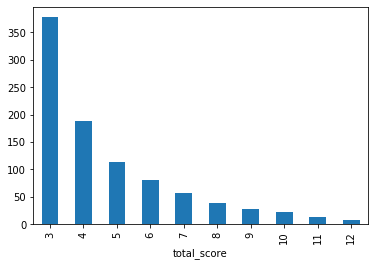

In [511]:
temp_rfm['Frequency'].groupby(by =temp_rfm['total_score']).mean().plot(kind ='bar')

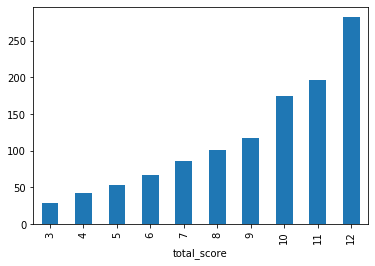

In [512]:
    temp_rfm['Recency'].groupby(by =temp_rfm['total_score']).mean().plot(kind ='bar')

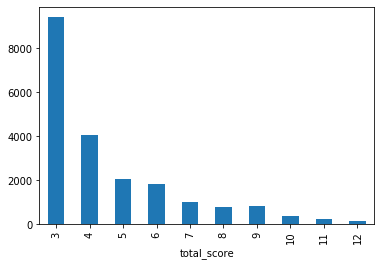

In [513]:
temp_rfm['Monetory'].groupby(by =temp_rfm['total_score']).mean().plot(kind ='bar')